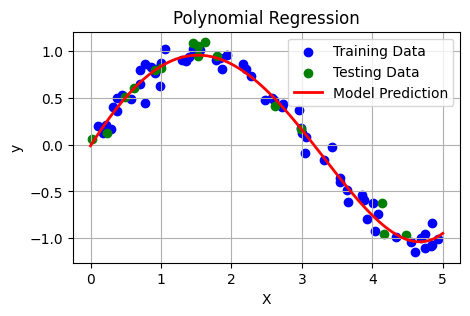

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import logging # Import the logging module

# ----------------------------
# Generate dummy sine-wave data
# ----------------------------
def generate_data(seed=42, samples=80):
    np.random.seed(seed)
    X = np.sort(5 * np.random.rand(samples, 1), axis=0)
    y = np.sin(X).ravel() + np.random.normal(0, 0.1, samples)
    return X, y


# ----------------------------
# Build and train the model
# ----------------------------
def build_model(degree=4):
    model = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree)),
        ("linear_regression", LinearRegression())
    ])
    return model


# ----------------------------
# Plot predictions
# ----------------------------
def plot_model(X_train, y_train, X_test, y_test, model, title="Polynomial Regression"):
    plt.figure(figsize=(5, 3))
    plt.scatter(X_train, y_train, color='blue', label="Training Data")
    plt.scatter(X_test, y_test, color='green', label="Testing Data")

    X_plot = np.linspace(0, 5, 100).reshape(-1, 1)
    y_plot = model.predict(X_plot)
    plt.plot(X_plot, y_plot, color='red', linewidth=2, label="Model Prediction")

    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()


# ----------------------------
# Evaluate and log performance
# ----------------------------
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    logging.info(f"Train MSE: {train_mse:.4f}")
    logging.info(f"Test MSE:  {test_mse:.4f}")

    return train_mse, test_mse


# ----------------------------
# Main Pipeline
# ----------------------------
def main():
    # Step 1: Data Preparation
    X, y = generate_data()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 2: Model Training
    degree = 4
    model = build_model(degree)
    model.fit(X_train, y_train)

    # Step 3: Evaluation
    train_mse, test_mse = evaluate_model(model, X_train, y_train, X_test, y_test)

    # Step 4: Visualization
    plot_model(X_train, y_train, X_test, y_test, model)


# ----------------------------
# Entry Point
# ----------------------------
if __name__ == "__main__":
    main()